# Лабораторная работа 4. Методы поиска.

# Выполнил студент группы БСТ2105 Мжавия Н.Р

In [35]:
import random
import math
import time
import pandas as pd
import matplotlib.pyplot as plt

# Задание 1 

# Бинарное дерево

In [67]:
class Node:
    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None


class BinaryTree:
    def __init__(self):
        self.root = None

    def insert(self, value):
        new_node = Node(value)  # Создание нового узла
        if self.root is None:  # Если дерево пустое
            self.root = new_node  # Новый узел становится корневым
            return
        current = self.root  # Текущий узел - корневой
        while True:
            if value < current.value:  # Если значение меньше значения текущего узла
                if current.left is None:  # Если левый потомок отсутствует
                    current.left = new_node  # Новый узел становится левым потомком текущего узла
                    break
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше или равно значению текущего узла
                if current.right is None:  # Если правый потомок отсутствует
                    current.right = new_node  # Новый узел становится правым потомком текущего узла
                    break
                current = current.right  # Текущим узлом становится правый потомок текущего узла

    def search(self, value):
        current = self.root  # Текущий узел - корневой
        while True:
            if current is None:  # Если текущий узел отсутствует
                return False  # Узел не найден
            if current.value == value:  # Если значения текущего узла искомого узла равны
                return True  # Узел найден
            elif value < current.value:  # Если значение меньше значения текущего узла
                current = current.left  # Текущим узлом становится левый потомок текущего узла
            else:  # Если значение больше значения текущего узла
                current = current.right  # Текущим узлом становится правый потомок текущего узла
                
    def printTree(self, node):
        if node is None:
            return
        self.printTree(node.left)
        print(node.value)
        self.printTree(node.right)

In [69]:
tree = BinaryTree()
for i in range(10):
    tree.insert(random.randint(1, 10))
print(tree.search(8))
tree.printTree(tree.root)

True
2
3
3
3
3
4
6
7
8
10


In [56]:
data = [random.randint(1, 100) for i in range(10)]
data.sort()
print('Исходные данные:', data)

Исходные данные: [9, 26, 33, 57, 86, 88, 90, 92, 99, 100]


# Бинарный поиск

In [57]:
# Функция бинарного поиска принимает на вход отсортированный массив и элемент, который нужно найти
def binary_search(arr, item):
    mid = len(arr) // 2
    low = 0 # Нижняя граница для поиска устанавливается на первый элемент массива
    high = len(arr) - 1 # Верхняя граница для поиска устанавливается на последний элемент массива
    while low < high and mid != value: # Пока нижняя граница не станет больше верхней границы
        if arr[mid] > item: # Если средний элемент больше искомого, то ищем элемент в левой половине массива
            high = mid - 1
        else: # Иначе ищем элемент в правой половине массива
            low = mid + 1
        mid = (low + high) // 2 # Находим средний элемент массива
    return None if high>low else mid # Если элемент не найден, то возвращаем None

In [58]:
value = int(input("Введите искомое значение: "))
print("id элемента =",binary_search(data,value))

Введите искомое значение: 9
id элемента = 1


# Фибоначчиев

In [59]:
def fibonacci_search(arr, item):
    # Определяем числа Фибоначчи
    fib1, fib2 = 0, 1
    fib_sum = fib1 + fib2
    while fib_sum < len(arr):
        fib1 = fib2
        fib2 = fib_sum
        fib_sum = fib1 + fib2
    # Инициализируем границы для поиска элемента
    offset = -1
    while fib_sum > 1:
        i = min(offset + fib1, len(arr) - 1)
        if arr[i] < item:
            fib_sum = fib2
            fib2 = fib1
            fib1 = fib_sum - fib2
            offset = i
        elif arr[i] > item:
            fib_sum = fib1
            fib2 = fib2 - fib1
            fib1 = fib_sum - fib2
        else:
            return i
    if fib2 == 1 and arr[offset+1] == item:
        return offset + 1
    return None 

In [60]:

print ("Исходны массив ", data)
value = int(input("Введите искомое значение: "))
print("id элемента =",fibonacci_search(data,value))

Исходны массив  [9, 26, 33, 57, 86, 88, 90, 92, 99, 100]
Введите искомое значение: 9
id элемента = 0


In [71]:
def interpolation_search(arr, item):
    low = 0
    high = len(arr) - 1
    while low <= high and item >= arr[low] and item <= arr[high]:
        pos = low + ((item - arr[low]) * (high - low) // (arr[high] - arr[low]))
        if arr[pos] == item:
            return pos
        elif arr[pos] < item:
            low = pos + 1
        else:
            high = pos - 1
    return None

In [73]:
print ("Исходны массив ", data)
value = int(input("Введите искомое значение: "))
print("id элемента =",interpolation_search(data,value))

Исходны массив  [9, 26, 33, 57, 86, 88, 90, 92, 99, 100]
Введите искомое значение: 100
id элемента = 9


Сравнение методов поиска

In [87]:
arrays, elems = [], []
for i in range(1, 11):
    arrays.append([random.randint(1, 1000*i) for _ in range(1000*i)])
    elems.append(1000*i)

In [88]:
binary = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = binary_search(array, 999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binary.append(end-start)

1000 элементов:  7.8e-05 cекунд
2000 элементов:  0.000219 cекунд
3000 элементов:  0.000339 cекунд
4000 элементов:  0.000378 cекунд
5000 элементов:  0.000472 cекунд
6000 элементов:  0.000584 cекунд
7000 элементов:  0.00069 cекунд
8000 элементов:  0.000856 cекунд
9000 элементов:  0.000984 cекунд
10000 элементов:  0.00123 cекунд


In [93]:
fibonacci = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = fibonacci_search(array, 999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    fibonacci.append(end-start)

1000 элементов:  0.000205 cекунд
2000 элементов:  0.000185 cекунд
3000 элементов:  0.000273 cекунд
4000 элементов:  0.000365 cекунд
5000 элементов:  0.000462 cекунд
6000 элементов:  0.000573 cекунд
7000 элементов:  0.000692 cекунд
8000 элементов:  0.000785 cекунд
9000 элементов:  0.00089 cекунд
10000 элементов:  0.001023 cекунд


In [89]:
binarytree = []
for i in range(len(arrays)):
    tree = BinaryTree()
    for elem in arrays[i]:
        tree.insert(elem)
    start = time.perf_counter()
    res = tree.search(999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    binarytree.append(end-start)

1000 элементов:  6e-06 cекунд
2000 элементов:  5e-06 cекунд
3000 элементов:  4e-06 cекунд
4000 элементов:  5e-06 cекунд
5000 элементов:  3e-06 cекунд
6000 элементов:  5e-06 cекунд
7000 элементов:  5e-06 cекунд
8000 элементов:  6e-06 cекунд
9000 элементов:  5e-06 cекунд
10000 элементов:  5e-06 cекунд


In [90]:
interpol = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    res = interpolation_search(array, 999*i+1)
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    interpol.append(end-start)

1000 элементов:  0.000134 cекунд
2000 элементов:  0.000176 cекунд
3000 элементов:  0.000283 cекунд
4000 элементов:  0.000373 cекунд
5000 элементов:  0.00049 cекунд
6000 элементов:  0.000629 cекунд
7000 элементов:  0.000645 cекунд
8000 элементов:  0.0008 cекунд
9000 элементов:  0.001106 cекунд
10000 элементов:  0.001258 cекунд


In [91]:
python = []
for i in range(len(arrays)):
    start = time.perf_counter()
    array = sorted(arrays[i])
    try:
        array.index(999*i+1)
    except ValueError:
        pass
    end = time.perf_counter()
    print(1000*(i+1), "элементов: ", round(end-start, 6), "cекунд")
    python.append(end-start)

1000 элементов:  0.000139 cекунд
2000 элементов:  0.000175 cекунд
3000 элементов:  0.000326 cекунд
4000 элементов:  0.000391 cекунд
5000 элементов:  0.000497 cекунд
6000 элементов:  0.0006 cекунд
7000 элементов:  0.000714 cекунд
8000 элементов:  0.000846 cекунд
9000 элементов:  0.000998 cекунд
10000 элементов:  0.001226 cекунд


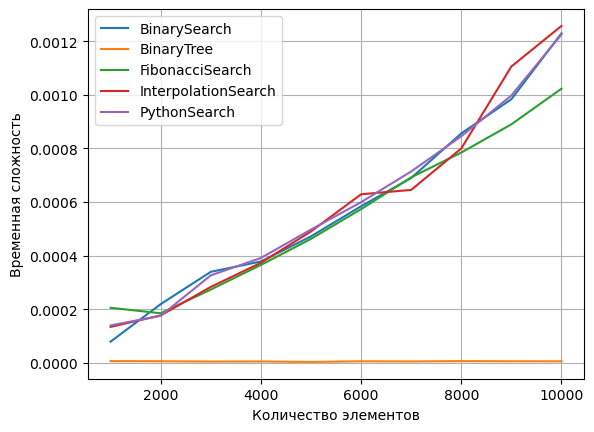

In [94]:
#общий график - сравнение алгоритмов
plt.xlabel('Количество элементов')
plt.ylabel('Временная сложность')
plt.plot(elems, binary, label ='BinarySearch')
plt.plot(elems, binarytree, label ='BinaryTree')
plt.plot(elems, fibonacci, label ='FibonacciSearch')
plt.plot(elems, interpol, label ='InterpolationSearch')
plt.plot(elems, python, label ='PythonSearch')
plt.grid()
plt.legend()
plt.show()

In [95]:
df = pd.DataFrame({'BinarySearch': [binary[i] for i in range(10)],
                   'BinaryTree': [binarytree[i] for i in range(10)],
                   'FibonacciSearch': [fibonacci[i] for i in range(10)],
                   'InterpolationSearch': [interpol[i] for i in range(10)],
                   'PythonSearch': [python[i] for i in range(10)]}, index=elems).round(6)

df

,BinarySearch,BinaryTree,FibonacciSearch,InterpolationSearch,PythonSearch
1000,0.000078,0.000006,0.000205,0.000134,0.000139
2000,0.000219,0.000005,0.000185,0.000176,0.000175
3000,0.000339,0.000004,0.000273,0.000283,0.000326
4000,0.000378,0.000005,0.000365,0.000373,0.000391
5000,0.000472,0.000003,0.000462,0.000490,0.000497
6000,0.000584,0.000005,0.000573,0.000629,0.000600
7000,0.000690,0.000005,0.000692,0.000645,0.000714
8000,0.000856,0.000006,0.000785,0.000800,0.000846
9000,0.000984,0.000005,0.000890,0.001106,0.000998
10000,0.001230,0.000005,0.001023,0.001258,0.001226


# Задание 2

Простое рехэширование

In [74]:
def hash_generate(key):
    return key % 6

def insert(key, value):
    index = hash_generate(key)
    while index in hash_table:
        index = (index + 1) % 5
    hash_table[index] = value

In [76]:
hash_table = {}
insert(1, 12)
insert(2, 0)
insert(4, 44)
insert(11, 33)
insert(11, 17)
print(hash_table)

{1: 12, 2: 0, 4: 44, 5: 33, 3: 17}


Рехэширование с псевдослучайными числами

In [77]:
def RandomHash(numbers: list) -> list:
    # Создаем новый список для хранения перехешированных чисел
    new_numbers = []
    # Перебираем числа из исходного списка
    for number in numbers:
        # Генерируем псевдослучайное число в диапазоне от 0 до 100
        random_number = random.randint(0, 100)
        # Перехешируем число с помощью псевдослучайного числа
        hashed_number = (number * random_number) % 101
        # Добавляем перехешированное число в новый список
        new_numbers.append(hashed_number)
    return new_numbers

In [78]:
n = int(input("Enter N: "))
# Создаем список чисел
numbers = [random.randint(1, 100) for _ in range(n)]
# Выводим исходный список и список перехешированных чисел
print("Исходный список чисел:", numbers)
print("Перехешированный список чисел:", RandomHash(numbers))

Enter N: 10
Исходный список чисел: [80, 48, 46, 68, 53, 93, 13, 14, 7, 3]
Перехешированный список чисел: [53, 100, 23, 44, 85, 89, 30, 5, 7, 21]


Метод цепочек

In [79]:
# Метод цепочек - это метод решения коллизий в хэш-таблицах.
# Он основан на создании связанных списков (цепочек) элементов,
# которые имеют одинаковый хэш-код.
# Создаем класс узла списка
class HashNode:
    def __init__(self, key, value):
        self.key = key
        self.value = value
        self.next = None


# Создаем класс хэш-таблицы
class HashTable:
    def __init__(self):
        self.capacity = 10  # начальная емкость таблицы
        self.size = 0  # количество элементов в таблице
        self.buckets = [None] * self.capacity  # создаем пустые списки для каждой ячейки таблицы

    # Метод добавления элемента в таблицу
    def add(self, key, value):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ уже есть в таблице, обновляем значение
                node.value = value
                return
            node = node.next
        # если ключа нет в таблице, добавляем его в начало цепочки
        new_node = HashNode(key, value)
        new_node.next = self.buckets[index]
        self.buckets[index] = new_node
        self.size += 1
        # если количество элементов превысило 70% от емкости таблицы, увеличиваем емкость вдвое
        if self.size > 0.7 * self.capacity:
            self.resize()

    # Метод получения значения по ключу
    def get(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, возвращаем его значение
                return node.value
            node = node.next
        # если ключ не найден, возвращаем None
        return None

    # Метод удаления элемента из таблицы
    def remove(self, key):
        index = hash(key) % self.capacity  # вычисляем хэш-код ключа и индекс ячейки таблицы
        node = self.buckets[index]  # получаем список (цепочку) элементов по индексу
        prev = None
        while node:  # проходим по всем элементам цепочки
            if node.key == key:  # если ключ найден, удаляем элемент
                if prev:
                    prev.next = node.next
                else:
                    self.buckets[index] = node.next
                self.size -= 1
                return
            prev = node
            node = node.next

    # Метод изменения емкости таблицы
    def resize(self):
        new_capacity = self.capacity * 2  # увеличиваем емкость вдвое
        new_buckets = [None] * new_capacity  # создаем новую таблицу с увеличенной емкостью
        # перехешируем все элементы из старой таблицы в новую
        for i in range(self.capacity):
            node = self.buckets[i]
            while node:
                index = hash(node.key) % new_capacity
                if new_buckets[index]:
                    new_node = new_buckets[index]
                    while new_node.next:
                        new_node = new_node.next
                    new_node.next = HashNode(node.key, node.value)
                else:
                    new_buckets[index] = HashNode(node.key, node.value)
                node = node.next
        self.capacity = new_capacity
        self.buckets = new_buckets

In [80]:
ht = HashTable()
ht.add('key1', 'value1')
ht.add('key2', 'value2')
ht.add('key3', 'value3')
ht.add('key4', 'value4')
ht.add('key5', 1)
ht.add('key6', 2)
print(ht.get('key1')) # 'value1'
ht.remove('key3')
print(ht.get('key3')) # None
print(ht.get('key5')) # 1
print(ht.get('key6')) # 2

value1
None
1
2


# Задание 3

Расставить на стандартной 64-клеточной шахматной доске 8 ферзей так, чтобы ни один из них не находился под боем другого». Подразумевается, что ферзь бьёт все клетки, расположенные по вертикалям, горизонталям и обеим диагоналям

In [84]:
class Queen:
    def __init__(self, x, y):
        self.x = x
        self.y = y

    def attack(self, queen) -> bool:
        return self.x == queen.x or self.y == queen.y or abs(queen.x - self.x) == abs(queen.y - self.y)

    def getCoord(self):
        return (self.x, self.y)


def SolveQueens(boardSize: int, queens: list = None):
    if queens is None:
        queens = [Queen(0, random.randint(0, boardSize - 1))]

    if len(queens) == boardSize:
        res = []
        for queen in queens:
            res.append(queen.getCoord())
        return res
    else:
        row = len(queens)
        candidates = [Queen(row, i) for i in range(boardSize)]
        for candidate in candidates:
            under_attack = False
            for queen in queens:
                if queen.attack(candidate):
                    under_attack = True
                    break
            if not under_attack:
                queens.append(candidate)
                result = SolveQueens(boardSize, queens)
                if result is not None:
                    return result
                queens.pop()
        return None


def Draw(placement):
    boardSize = len(placement)
    for x in range(boardSize):
        for y in range(boardSize):
            if (x, y) in placement:
                print("|K|", end="")
            else:
                print("|0|", end="")
        print()


Draw(SolveQueens(8))

|0||K||0||0||0||0||0||0|
|0||0||0||K||0||0||0||0|
|0||0||0||0||0||K||0||0|
|0||0||0||0||0||0||0||K|
|0||0||K||0||0||0||0||0|
|K||0||0||0||0||0||0||0|
|0||0||0||0||0||0||K||0|
|0||0||0||0||K||0||0||0|


# Вывод

В ходе данной лабораторной работы были реализованы методы поиска элемента в массиве и определены зависимости времени исполнения алгоритма от числа элементов массива, построен график и сводная таблица. Были реализованы три вида хэширования. Была решена задача с расстановкой ферзей на шахматной доске.